In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from keras.utils import np_utils
np.random.seed(10)
from keras.datasets import mnist

from keras.models import Sequential

from keras.layers import Dropout
from keras.layers import Input, Dense, Lambda
from keras.models import Model
from keras import backend as K
from keras import objectives
from keras.datasets import mnist
from keras.utils.vis_utils import plot_model
import keras

Using TensorFlow backend.
C:\Users\User\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\User\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\User\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\User\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:519

In [2]:
def recategorize(data,columnname):
    
    counts = data[columnname].value_counts()
    nameSet = set(counts[counts>= 0.01*len(data.index)].index.values)
    
    data.loc[:,columnname] = data[columnname].apply(lambda x:'OTHER'if x not in nameSet else x)
    return data

In [3]:
data = pd.read_csv("training.csv")

print(len(data.index)) # number of data (cars)

data.info()
#如果有一個missing 則去掉此物件
data2 = data.dropna(axis =0, how = 'any', subset = ['Color',
                                                    'Transmission',
                                                    'Nationality',
                                                    'Size',
                                                    'TopThreeAmericanName',
                                                    'MMRAcquisitionAuctionAveragePrice',
                                                    'MMRAcquisitionAuctionCleanPrice',
                                                    'MMRAcquisitionRetailAveragePrice',
                                                    'MMRAcquisitonRetailCleanPrice',
                                                    'MMRCurrentAuctionAveragePrice',
                                                    'MMRCurrentAuctionCleanPrice',
                                                    'MMRCurrentRetailAveragePrice',
                                                    'MMRCurrentRetailCleanPrice'])

72983
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72983 entries, 0 to 72982
Data columns (total 34 columns):
RefId                                72983 non-null int64
IsBadBuy                             72983 non-null int64
PurchDate                            72983 non-null object
Auction                              72983 non-null object
VehYear                              72983 non-null int64
VehicleAge                           72983 non-null int64
Make                                 72983 non-null object
Model                                72983 non-null object
Trim                                 70623 non-null object
SubModel                             72975 non-null object
Color                                72975 non-null object
Transmission                         72974 non-null object
WheelTypeID                          69814 non-null float64
WheelType                            69809 non-null object
VehOdo                               72983 non-null int64
Nati

In [4]:
data2['MMRAcquisitionAuctionAveragePrice'] = pd.to_numeric(data2['MMRAcquisitionAuctionAveragePrice'])

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [5]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 72658 entries, 0 to 72982
Data columns (total 34 columns):
RefId                                72658 non-null int64
IsBadBuy                             72658 non-null int64
PurchDate                            72658 non-null object
Auction                              72658 non-null object
VehYear                              72658 non-null int64
VehicleAge                           72658 non-null int64
Make                                 72658 non-null object
Model                                72658 non-null object
Trim                                 70301 non-null object
SubModel                             72658 non-null object
Color                                72658 non-null object
Transmission                         72658 non-null object
WheelTypeID                          69499 non-null float64
WheelType                            69494 non-null object
VehOdo                               72658 non-null int64
Nationalit

In [6]:
for i in range(len(data2.columns)):
    data2 = recategorize(data2, str(data2.columns[i]))

C:\Users\User\Anaconda3\lib\site-packages\pandas\core\indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [7]:
data2_cleaned = data2.drop(["RefId","PurchDate","VehYear","WheelTypeID","BYRNO","VNZIP1","PRIMEUNIT","AUCGUART","Trim"],axis=1)

In [8]:
data2_cleaned

,IsBadBuy,Auction,VehicleAge,Make,Model,SubModel,Color,Transmission,WheelType,VehOdo,...,MMRAcquisitionRetailAveragePrice,MMRAcquisitonRetailCleanPrice,MMRCurrentAuctionAveragePrice,MMRCurrentAuctionCleanPrice,MMRCurrentRetailAveragePrice,MMRCurrentRetailCleanPrice,VNST,VehBCost,IsOnlineSale,WarrantyCost
0,0,ADESA,3,MAZDA,OTHER,OTHER,RED,AUTO,Alloy,OTHER,...,OTHER,OTHER,OTHER,OTHER,OTHER,OTHER,FL,OTHER,0,OTHER
1,0,ADESA,5,DODGE,1500 RAM PICKUP 2WD,OTHER,WHITE,AUTO,Alloy,OTHER,...,OTHER,OTHER,OTHER,OTHER,OTHER,OTHER,FL,OTHER,0,OTHER
2,0,ADESA,4,DODGE,OTHER,4D SEDAN SXT FFV,MAROON,AUTO,Covers,OTHER,...,OTHER,OTHER,OTHER,OTHER,OTHER,OTHER,FL,OTHER,0,1389
3,0,ADESA,5,DODGE,OTHER,4D SEDAN,SILVER,AUTO,Alloy,OTHER,...,OTHER,OTHER,OTHER,OTHER,OTHER,OTHER,FL,OTHER,0,OTHER
4,0,ADESA,4,FORD,FOCUS,OTHER,SILVER,MANUAL,Covers,OTHER,...,OTHER,OTHER,OTHER,OTHER,OTHER,OTHER,FL,OTHER,0,1020
5,0,ADESA,5,MITSUBISHI,OTHER,OTHER,WHITE,AUTO,Covers,OTHER,...,OTHER,OTHER,OTHER,OTHER,OTHER,OTHER,FL,OTHER,0,594
6,0,ADESA,5,KIA,OTHER,4D SEDAN EX,BLACK,AUTO,Covers,OTHER,...,OTHER,OTHER,OTHER,OTHER,OTHER,OTHER,FL,OTHER,0,533
7,0,ADESA,4,FORD,TAURUS,4D SEDAN SE,WHITE,AUTO,Covers,OTHER,...,OTHER,OTHER,OTHER,OTHER,OTHER,OTHER,FL,OTHER,0,825
8,0,ADESA,2,KIA,OTHER,4D SEDAN EX,BLACK,AUTO,Covers,OTHER,...,OTHER,OTHER,OTHER,OTHER,OTHER,OTHER,FL,OTHER,0,482
9,0,ADESA,2,FORD,OTHER,4D SEDAN SEL,RED,AUTO,Alloy,OTHER,...,OTHER,OTHER,OTHER,OTHER,OTHER,OTHER,FL,OTHER,0,1633


In [9]:
data2_cleaned1 = data2_cleaned[:70000]
dataFinal = pd.get_dummies(data2_cleaned1)
len(list(dataFinal))
dataFinal.head()
Y = dataFinal.loc[:,"IsBadBuy"]
X = dataFinal.drop("IsBadBuy",1)
#X.head()
dataFinal.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 70000 entries, 0 to 70308
Columns: 166 entries, IsBadBuy to WarrantyCost_OTHER
dtypes: int64(2), uint8(164)
memory usage: 12.6 MB


In [10]:
for i, items in  enumerate(dataFinal.columns):
    print(i,items)

0 IsBadBuy
1 IsOnlineSale
2 Auction_ADESA
3 Auction_MANHEIM
4 Auction_OTHER
5 VehicleAge_1
6 VehicleAge_2
7 VehicleAge_3
8 VehicleAge_4
9 VehicleAge_5
10 VehicleAge_6
11 VehicleAge_7
12 VehicleAge_8
13 VehicleAge_OTHER
14 Make_CHEVROLET
15 Make_CHRYSLER
16 Make_DODGE
17 Make_FORD
18 Make_HYUNDAI
19 Make_JEEP
20 Make_KIA
21 Make_MAZDA
22 Make_MERCURY
23 Make_MITSUBISHI
24 Make_NISSAN
25 Make_OTHER
26 Make_PONTIAC
27 Make_SATURN
28 Make_SUZUKI
29 Make_TOYOTA
30 Model_1500 RAM PICKUP 2WD
31 Model_CALIBER
32 Model_CARAVAN GRAND FWD V6
33 Model_COBALT
34 Model_FOCUS
35 Model_GRAND PRIX
36 Model_GRAND PRIX 3.8L V6 S
37 Model_IMPALA
38 Model_IMPALA 3.5L V6 SFI
39 Model_IMPALA V6
40 Model_MALIBU 4C
41 Model_OTHER
42 Model_PT CRUISER
43 Model_PT CRUISER 2.4L I4 S
44 Model_SEBRING 4C
45 Model_STRATUS V6 2.7L V6 M
46 Model_TAURUS
47 Model_TAURUS 3.0L V6 EFI
48 SubModel_2D COUPE
49 SubModel_4D SEDAN
50 SubModel_4D SEDAN EX
51 SubModel_4D SEDAN LS
52 SubModel_4D SEDAN LT
53 SubModel_4D SEDAN LT 3.5

In [11]:
from sklearn.preprocessing import StandardScaler as SC
sc = SC()
Xnew = sc.fit_transform(X)
X = np.array(X)
Y = np.array(Y)
from sklearn.linear_model import LogisticRegression as LR
from sklearn.model_selection import train_test_split
X_train_ori, X_test_ori, Y_train_ori, Y_test_ori = train_test_split(X, Y)
X_train, X_test, Y_train, Y_test = train_test_split(Xnew, Y)


Y_train_ori_onehot = np_utils.to_categorical(Y_train_ori)
Y_test_ori_onehot = np_utils.to_categorical(Y_test_ori)
#Y_train_onehot = np_utils.to_categorical(Y_train)
#Y_test_onehot = np_utils.to_categorical(Y_test)


In [12]:
X_train_ori.shape

(52500, 165)

In [16]:
batch_size = 2500
original_dim = 165
latent_dim = 2
intermediate_dim = 800
nb_epoch = 4500
epsilon_std = 1.0

In [17]:
def sampling(args): 
    z_mean, z_log_var = args
    epsilon = K.random_normal(shape=(batch_size, latent_dim), mean=0.,stddev=epsilon_std)
    return z_mean + K.exp(z_log_var / 2) * epsilon


#my tips:loss(restruct X)+KL
def vae_loss(x, x_decoded_mean):
    #my tips:logloss
    xent_loss = original_dim * objectives.binary_crossentropy(x, x_decoded_mean)
    #my tips:see paper's appendix B
    kl_loss = - 0.5 * K.sum(1 + z_log_var - K.square(z_mean) - K.exp(z_log_var), axis=-1)
    return xent_loss + kl_loss

In [18]:
x = Input(batch_shape=(batch_size, original_dim))
h = Dense(intermediate_dim, activation='relu')(x)
z_mean = Dense(latent_dim)(h)
z_log_var = Dense(latent_dim)(h)

# note that "output_shape" isn't necessary with the TensorFlow backend
# my tips:get sample z(encoded)
z = Lambda(sampling,output_shape=(latent_dim,))([z_mean, z_log_var])
 
# we instantiate these layers separately so as to reuse them later
decoder_h = Dense(intermediate_dim, activation='relu')
decoder_mean = Dense(original_dim, activation='sigmoid')
h_decoded = decoder_h(z)
x_decoded_mean = decoder_mean(h_decoded)

#This model will include all layers required in the computation of x given x_decoded_mean.
vae = Model(x, x_decoded_mean)
adam = keras.optimizers.Adam(lr=0.0001, beta_1=0.99, beta_2=0.999, amsgrad=False)
vae.compile(optimizer=adam, loss=vae_loss)


# train the VAE on MNIST digits
vae.fit(x=X_train_ori,
        y=X_train_ori,
        epochs=nb_epoch,
        batch_size=batch_size,
        verbose=2,
        validation_data=(X_test_ori, X_test_ori))

Train on 52500 samples, validate on 17500 samples
Epoch 1/4500
 - 3s - loss: 113.1733 - val_loss: 110.9603
Epoch 2/4500
 - 3s - loss: 108.3560 - val_loss: 105.0467
Epoch 3/4500
 - 3s - loss: 101.1694 - val_loss: 96.5838
Epoch 4/4500
 - 3s - loss: 91.7407 - val_loss: 86.1599
Epoch 5/4500
 - 3s - loss: 81.5907 - val_loss: 77.3335
Epoch 6/4500
 - 3s - loss: 74.3876 - val_loss: 71.2834
Epoch 7/4500
 - 3s - loss: 67.7414 - val_loss: 64.1676
Epoch 8/4500
 - 3s - loss: 60.6506 - val_loss: 57.0995
Epoch 9/4500
 - 3s - loss: 54.3436 - val_loss: 51.5394
Epoch 10/4500
 - 3s - loss: 49.5619 - val_loss: 47.5831
Epoch 11/4500
 - 3s - loss: 46.1138 - val_loss: 44.6837
Epoch 12/4500
 - 3s - loss: 43.5227 - val_loss: 42.4223
Epoch 13/4500
 - 3s - loss: 41.5468 - val_loss: 40.7691
Epoch 14/4500
 - 3s - loss: 40.1318 - val_loss: 39.5767
Epoch 15/4500
 - 3s - loss: 39.0634 - val_loss: 38.5828
Epoch 16/4500
 - 3s - loss: 38.1667 - val_loss: 37.7995
Epoch 17/4500
 - 3s - loss: 37.4652 - val_loss: 37.1979
Ep

Epoch 146/4500
 - 3s - loss: 26.9116 - val_loss: 27.0006
Epoch 147/4500
 - 3s - loss: 26.8884 - val_loss: 26.9658
Epoch 148/4500
 - 3s - loss: 26.8601 - val_loss: 26.9386
Epoch 149/4500
 - 3s - loss: 26.8238 - val_loss: 26.8968
Epoch 150/4500
 - 3s - loss: 26.7977 - val_loss: 26.8645
Epoch 151/4500
 - 3s - loss: 26.7652 - val_loss: 26.8322
Epoch 152/4500
 - 3s - loss: 26.7476 - val_loss: 26.8230
Epoch 153/4500
 - 3s - loss: 26.7065 - val_loss: 26.7824
Epoch 154/4500
 - 3s - loss: 26.6751 - val_loss: 26.7680
Epoch 155/4500
 - 3s - loss: 26.6542 - val_loss: 26.7341
Epoch 156/4500
 - 3s - loss: 26.6276 - val_loss: 26.7099
Epoch 157/4500
 - 3s - loss: 26.5959 - val_loss: 26.6848
Epoch 158/4500
 - 3s - loss: 26.5832 - val_loss: 26.6377
Epoch 159/4500
 - 3s - loss: 26.5342 - val_loss: 26.6161
Epoch 160/4500
 - 3s - loss: 26.5301 - val_loss: 26.6084
Epoch 161/4500
 - 3s - loss: 26.4962 - val_loss: 26.5873
Epoch 162/4500
 - 3s - loss: 26.4705 - val_loss: 26.5368
Epoch 163/4500
 - 3s - loss: 26

Epoch 290/4500
 - 3s - loss: 24.7148 - val_loss: 24.8155
Epoch 291/4500
 - 3s - loss: 24.7092 - val_loss: 24.8041
Epoch 292/4500
 - 3s - loss: 24.6972 - val_loss: 24.8070
Epoch 293/4500
 - 3s - loss: 24.6940 - val_loss: 24.7922
Epoch 294/4500
 - 3s - loss: 24.6879 - val_loss: 24.7827
Epoch 295/4500
 - 3s - loss: 24.6680 - val_loss: 24.7771
Epoch 296/4500
 - 3s - loss: 24.6590 - val_loss: 24.7599
Epoch 297/4500
 - 3s - loss: 24.6526 - val_loss: 24.7680
Epoch 298/4500
 - 3s - loss: 24.6481 - val_loss: 24.7396
Epoch 299/4500
 - 3s - loss: 24.6283 - val_loss: 24.7381
Epoch 300/4500
 - 3s - loss: 24.6171 - val_loss: 24.7270
Epoch 301/4500
 - 3s - loss: 24.6102 - val_loss: 24.7273
Epoch 302/4500
 - 3s - loss: 24.6114 - val_loss: 24.7111
Epoch 303/4500
 - 3s - loss: 24.6057 - val_loss: 24.7252
Epoch 304/4500
 - 3s - loss: 24.5900 - val_loss: 24.7028
Epoch 305/4500
 - 3s - loss: 24.5864 - val_loss: 24.6869
Epoch 306/4500
 - 3s - loss: 24.5826 - val_loss: 24.6713
Epoch 307/4500
 - 3s - loss: 24

Epoch 434/4500
 - 3s - loss: 23.7592 - val_loss: 23.8395
Epoch 435/4500
 - 3s - loss: 23.7391 - val_loss: 23.8390
Epoch 436/4500
 - 3s - loss: 23.7287 - val_loss: 23.8314
Epoch 437/4500
 - 3s - loss: 23.7409 - val_loss: 23.8057
Epoch 438/4500
 - 3s - loss: 23.7282 - val_loss: 23.8308
Epoch 439/4500
 - 3s - loss: 23.7357 - val_loss: 23.8231
Epoch 440/4500
 - 3s - loss: 23.7164 - val_loss: 23.8098
Epoch 441/4500
 - 3s - loss: 23.7169 - val_loss: 23.8168
Epoch 442/4500
 - 3s - loss: 23.7116 - val_loss: 23.8142
Epoch 443/4500
 - 3s - loss: 23.7090 - val_loss: 23.7933
Epoch 444/4500
 - 3s - loss: 23.6984 - val_loss: 23.7874
Epoch 445/4500
 - 3s - loss: 23.7005 - val_loss: 23.7838
Epoch 446/4500
 - 3s - loss: 23.6898 - val_loss: 23.7788
Epoch 447/4500
 - 3s - loss: 23.6942 - val_loss: 23.7936
Epoch 448/4500
 - 3s - loss: 23.6912 - val_loss: 23.7928
Epoch 449/4500
 - 3s - loss: 23.6819 - val_loss: 23.7810
Epoch 450/4500
 - 3s - loss: 23.6741 - val_loss: 23.7599
Epoch 451/4500
 - 3s - loss: 23

Epoch 578/4500
 - 3s - loss: 23.1667 - val_loss: 23.2877
Epoch 579/4500
 - 3s - loss: 23.1682 - val_loss: 23.2702
Epoch 580/4500
 - 3s - loss: 23.1648 - val_loss: 23.2735
Epoch 581/4500
 - 3s - loss: 23.1564 - val_loss: 23.2601
Epoch 582/4500
 - 3s - loss: 23.1753 - val_loss: 23.2559
Epoch 583/4500
 - 3s - loss: 23.1638 - val_loss: 23.2544
Epoch 584/4500
 - 3s - loss: 23.1524 - val_loss: 23.2596
Epoch 585/4500
 - 3s - loss: 23.1551 - val_loss: 23.2497
Epoch 586/4500
 - 3s - loss: 23.1413 - val_loss: 23.2381
Epoch 587/4500
 - 3s - loss: 23.1538 - val_loss: 23.2384
Epoch 588/4500
 - 3s - loss: 23.1440 - val_loss: 23.2417
Epoch 589/4500
 - 3s - loss: 23.1251 - val_loss: 23.2398
Epoch 590/4500
 - 3s - loss: 23.1325 - val_loss: 23.2419
Epoch 591/4500
 - 3s - loss: 23.1420 - val_loss: 23.2421
Epoch 592/4500
 - 3s - loss: 23.1307 - val_loss: 23.2325
Epoch 593/4500
 - 3s - loss: 23.1211 - val_loss: 23.2182
Epoch 594/4500
 - 3s - loss: 23.1254 - val_loss: 23.2244
Epoch 595/4500
 - 3s - loss: 23

Epoch 722/4500
 - 3s - loss: 22.7731 - val_loss: 22.8898
Epoch 723/4500
 - 3s - loss: 22.7736 - val_loss: 22.8848
Epoch 724/4500
 - 3s - loss: 22.7769 - val_loss: 22.8771
Epoch 725/4500
 - 3s - loss: 22.7664 - val_loss: 22.8855
Epoch 726/4500
 - 3s - loss: 22.7631 - val_loss: 22.8815
Epoch 727/4500
 - 3s - loss: 22.7561 - val_loss: 22.8742
Epoch 728/4500
 - 3s - loss: 22.7561 - val_loss: 22.8716
Epoch 729/4500
 - 3s - loss: 22.7552 - val_loss: 22.8719
Epoch 730/4500
 - 3s - loss: 22.7496 - val_loss: 22.8640
Epoch 731/4500
 - 3s - loss: 22.7600 - val_loss: 22.8698
Epoch 732/4500
 - 3s - loss: 22.7549 - val_loss: 22.8688
Epoch 733/4500
 - 3s - loss: 22.7502 - val_loss: 22.8620
Epoch 734/4500
 - 3s - loss: 22.7583 - val_loss: 22.8716
Epoch 735/4500
 - 3s - loss: 22.7437 - val_loss: 22.8388
Epoch 736/4500
 - 3s - loss: 22.7502 - val_loss: 22.8628
Epoch 737/4500
 - 3s - loss: 22.7388 - val_loss: 22.8562
Epoch 738/4500
 - 3s - loss: 22.7391 - val_loss: 22.8482
Epoch 739/4500
 - 3s - loss: 22

Epoch 866/4500
 - 3s - loss: 22.4930 - val_loss: 22.6212
Epoch 867/4500
 - 3s - loss: 22.4869 - val_loss: 22.6251
Epoch 868/4500
 - 3s - loss: 22.4897 - val_loss: 22.6212
Epoch 869/4500
 - 3s - loss: 22.4866 - val_loss: 22.6228
Epoch 870/4500
 - 3s - loss: 22.4887 - val_loss: 22.6118
Epoch 871/4500
 - 4s - loss: 22.4789 - val_loss: 22.6058
Epoch 872/4500
 - 3s - loss: 22.4792 - val_loss: 22.5889
Epoch 873/4500
 - 3s - loss: 22.4857 - val_loss: 22.6050
Epoch 874/4500
 - 4s - loss: 22.4747 - val_loss: 22.5825
Epoch 875/4500
 - 3s - loss: 22.4685 - val_loss: 22.5789
Epoch 876/4500
 - 3s - loss: 22.4752 - val_loss: 22.6145
Epoch 877/4500
 - 3s - loss: 22.4767 - val_loss: 22.6184
Epoch 878/4500
 - 3s - loss: 22.4654 - val_loss: 22.5914
Epoch 879/4500
 - 3s - loss: 22.4804 - val_loss: 22.5901
Epoch 880/4500
 - 3s - loss: 22.4656 - val_loss: 22.5914
Epoch 881/4500
 - 3s - loss: 22.4662 - val_loss: 22.6027
Epoch 882/4500
 - 3s - loss: 22.4585 - val_loss: 22.5748
Epoch 883/4500
 - 3s - loss: 22

Epoch 1010/4500
 - 3s - loss: 22.2721 - val_loss: 22.4166
Epoch 1011/4500
 - 3s - loss: 22.2701 - val_loss: 22.4099
Epoch 1012/4500
 - 3s - loss: 22.2654 - val_loss: 22.4001
Epoch 1013/4500
 - 3s - loss: 22.2641 - val_loss: 22.4174
Epoch 1014/4500
 - 3s - loss: 22.2601 - val_loss: 22.4045
Epoch 1015/4500
 - 3s - loss: 22.2722 - val_loss: 22.4082
Epoch 1016/4500
 - 3s - loss: 22.2692 - val_loss: 22.3939
Epoch 1017/4500
 - 3s - loss: 22.2690 - val_loss: 22.3944
Epoch 1018/4500
 - 3s - loss: 22.2647 - val_loss: 22.4081
Epoch 1019/4500
 - 3s - loss: 22.2535 - val_loss: 22.4148
Epoch 1020/4500
 - 3s - loss: 22.2577 - val_loss: 22.3891
Epoch 1021/4500
 - 3s - loss: 22.2540 - val_loss: 22.3997
Epoch 1022/4500
 - 3s - loss: 22.2550 - val_loss: 22.3881
Epoch 1023/4500
 - 3s - loss: 22.2539 - val_loss: 22.4126
Epoch 1024/4500
 - 3s - loss: 22.2447 - val_loss: 22.3916
Epoch 1025/4500
 - 3s - loss: 22.2556 - val_loss: 22.3946
Epoch 1026/4500
 - 3s - loss: 22.2439 - val_loss: 22.3941
Epoch 1027/450

 - 3s - loss: 22.1131 - val_loss: 22.2584
Epoch 1152/4500
 - 3s - loss: 22.1063 - val_loss: 22.2362
Epoch 1153/4500
 - 3s - loss: 22.1005 - val_loss: 22.2600
Epoch 1154/4500
 - 3s - loss: 22.0937 - val_loss: 22.2548
Epoch 1155/4500
 - 3s - loss: 22.1034 - val_loss: 22.2351
Epoch 1156/4500
 - 3s - loss: 22.1003 - val_loss: 22.2491
Epoch 1157/4500
 - 3s - loss: 22.1024 - val_loss: 22.2424
Epoch 1158/4500
 - 3s - loss: 22.0986 - val_loss: 22.2397
Epoch 1159/4500
 - 3s - loss: 22.1003 - val_loss: 22.2579
Epoch 1160/4500
 - 3s - loss: 22.0986 - val_loss: 22.2104
Epoch 1161/4500
 - 3s - loss: 22.0885 - val_loss: 22.2519
Epoch 1162/4500
 - 3s - loss: 22.0892 - val_loss: 22.2349
Epoch 1163/4500
 - 3s - loss: 22.0996 - val_loss: 22.2432
Epoch 1164/4500
 - 3s - loss: 22.0953 - val_loss: 22.2340
Epoch 1165/4500
 - 3s - loss: 22.0988 - val_loss: 22.2389
Epoch 1166/4500
 - 3s - loss: 22.0997 - val_loss: 22.2396
Epoch 1167/4500
 - 3s - loss: 22.0879 - val_loss: 22.2408
Epoch 1168/4500
 - 3s - loss: 

Epoch 1293/4500
 - 3s - loss: 21.9615 - val_loss: 22.1007
Epoch 1294/4500
 - 3s - loss: 21.9671 - val_loss: 22.1073
Epoch 1295/4500
 - 3s - loss: 21.9647 - val_loss: 22.1198
Epoch 1296/4500
 - 3s - loss: 21.9629 - val_loss: 22.1164
Epoch 1297/4500
 - 3s - loss: 21.9665 - val_loss: 22.1212
Epoch 1298/4500
 - 3s - loss: 21.9707 - val_loss: 22.1196
Epoch 1299/4500
 - 3s - loss: 21.9555 - val_loss: 22.1075
Epoch 1300/4500
 - 3s - loss: 21.9598 - val_loss: 22.1217
Epoch 1301/4500
 - 3s - loss: 21.9560 - val_loss: 22.1251
Epoch 1302/4500
 - 3s - loss: 21.9649 - val_loss: 22.1112
Epoch 1303/4500
 - 3s - loss: 21.9589 - val_loss: 22.1166
Epoch 1304/4500
 - 3s - loss: 21.9550 - val_loss: 22.0870
Epoch 1305/4500
 - 3s - loss: 21.9588 - val_loss: 22.1021
Epoch 1306/4500
 - 3s - loss: 21.9525 - val_loss: 22.1107
Epoch 1307/4500
 - 3s - loss: 21.9533 - val_loss: 22.1139
Epoch 1308/4500
 - 3s - loss: 21.9565 - val_loss: 22.1298
Epoch 1309/4500
 - 3s - loss: 21.9533 - val_loss: 22.1176
Epoch 1310/450

 - 4s - loss: 21.8483 - val_loss: 22.0090
Epoch 1435/4500
 - 4s - loss: 21.8474 - val_loss: 22.0148
Epoch 1436/4500
 - 4s - loss: 21.8429 - val_loss: 22.0171
Epoch 1437/4500
 - 4s - loss: 21.8384 - val_loss: 22.0063
Epoch 1438/4500
 - 4s - loss: 21.8345 - val_loss: 22.0035
Epoch 1439/4500
 - 4s - loss: 21.8455 - val_loss: 21.9941
Epoch 1440/4500
 - 4s - loss: 21.8423 - val_loss: 22.0134
Epoch 1441/4500
 - 4s - loss: 21.8425 - val_loss: 21.9959
Epoch 1442/4500
 - 4s - loss: 21.8410 - val_loss: 22.0165
Epoch 1443/4500
 - 4s - loss: 21.8347 - val_loss: 22.0228
Epoch 1444/4500
 - 4s - loss: 21.8444 - val_loss: 21.9918
Epoch 1445/4500
 - 4s - loss: 21.8389 - val_loss: 22.0254
Epoch 1446/4500
 - 4s - loss: 21.8434 - val_loss: 22.0234
Epoch 1447/4500
 - 4s - loss: 21.8405 - val_loss: 22.0143
Epoch 1448/4500
 - 4s - loss: 21.8442 - val_loss: 22.0078
Epoch 1449/4500
 - 4s - loss: 21.8429 - val_loss: 22.0136
Epoch 1450/4500
 - 4s - loss: 21.8328 - val_loss: 21.9944
Epoch 1451/4500
 - 4s - loss: 

Epoch 1576/4500
 - 4s - loss: 21.7455 - val_loss: 21.9196
Epoch 1577/4500
 - 4s - loss: 21.7442 - val_loss: 21.9171
Epoch 1578/4500
 - 4s - loss: 21.7420 - val_loss: 21.9107
Epoch 1579/4500
 - 4s - loss: 21.7409 - val_loss: 21.8971
Epoch 1580/4500
 - 4s - loss: 21.7406 - val_loss: 21.9136
Epoch 1581/4500
 - 4s - loss: 21.7406 - val_loss: 21.9053
Epoch 1582/4500
 - 4s - loss: 21.7322 - val_loss: 21.9052
Epoch 1583/4500
 - 4s - loss: 21.7428 - val_loss: 21.9112
Epoch 1584/4500
 - 4s - loss: 21.7422 - val_loss: 21.9165
Epoch 1585/4500
 - 4s - loss: 21.7425 - val_loss: 21.9229
Epoch 1586/4500
 - 4s - loss: 21.7402 - val_loss: 21.9214
Epoch 1587/4500
 - 4s - loss: 21.7375 - val_loss: 21.9114
Epoch 1588/4500
 - 4s - loss: 21.7331 - val_loss: 21.9196
Epoch 1589/4500
 - 4s - loss: 21.7328 - val_loss: 21.9250
Epoch 1590/4500
 - 4s - loss: 21.7352 - val_loss: 21.8968
Epoch 1591/4500
 - 4s - loss: 21.7316 - val_loss: 21.9203
Epoch 1592/4500
 - 4s - loss: 21.7288 - val_loss: 21.9052
Epoch 1593/450

 - 4s - loss: 21.6549 - val_loss: 21.8471
Epoch 1718/4500
 - 4s - loss: 21.6474 - val_loss: 21.8135
Epoch 1719/4500
 - 4s - loss: 21.6471 - val_loss: 21.8505
Epoch 1720/4500
 - 4s - loss: 21.6520 - val_loss: 21.8370
Epoch 1721/4500
 - 4s - loss: 21.6446 - val_loss: 21.8403
Epoch 1722/4500
 - 4s - loss: 21.6449 - val_loss: 21.8331
Epoch 1723/4500
 - 4s - loss: 21.6496 - val_loss: 21.8223
Epoch 1724/4500
 - 4s - loss: 21.6435 - val_loss: 21.8215
Epoch 1725/4500
 - 4s - loss: 21.6500 - val_loss: 21.8159
Epoch 1726/4500
 - 4s - loss: 21.6454 - val_loss: 21.8387
Epoch 1727/4500
 - 4s - loss: 21.6406 - val_loss: 21.8242
Epoch 1728/4500
 - 4s - loss: 21.6511 - val_loss: 21.8245
Epoch 1729/4500
 - 4s - loss: 21.6469 - val_loss: 21.8381
Epoch 1730/4500
 - 4s - loss: 21.6424 - val_loss: 21.8464
Epoch 1731/4500
 - 4s - loss: 21.6511 - val_loss: 21.8245
Epoch 1732/4500
 - 4s - loss: 21.6431 - val_loss: 21.8300
Epoch 1733/4500
 - 4s - loss: 21.6396 - val_loss: 21.8219
Epoch 1734/4500
 - 4s - loss: 

Epoch 1859/4500
 - 4s - loss: 21.5719 - val_loss: 21.7555
Epoch 1860/4500
 - 4s - loss: 21.5803 - val_loss: 21.7647
Epoch 1861/4500
 - 4s - loss: 21.5742 - val_loss: 21.7658
Epoch 1862/4500
 - 4s - loss: 21.5708 - val_loss: 21.7535
Epoch 1863/4500
 - 4s - loss: 21.5663 - val_loss: 21.7635
Epoch 1864/4500
 - 4s - loss: 21.5773 - val_loss: 21.7375
Epoch 1865/4500
 - 4s - loss: 21.5645 - val_loss: 21.7574
Epoch 1866/4500
 - 4s - loss: 21.5778 - val_loss: 21.7553
Epoch 1867/4500
 - 4s - loss: 21.5684 - val_loss: 21.7824
Epoch 1868/4500
 - 4s - loss: 21.5714 - val_loss: 21.7704
Epoch 1869/4500
 - 4s - loss: 21.5669 - val_loss: 21.7598
Epoch 1870/4500
 - 4s - loss: 21.5697 - val_loss: 21.7540
Epoch 1871/4500
 - 4s - loss: 21.5648 - val_loss: 21.7589
Epoch 1872/4500
 - 4s - loss: 21.5712 - val_loss: 21.7441
Epoch 1873/4500
 - 4s - loss: 21.5589 - val_loss: 21.7573
Epoch 1874/4500
 - 4s - loss: 21.5642 - val_loss: 21.7544
Epoch 1875/4500
 - 4s - loss: 21.5705 - val_loss: 21.7549
Epoch 1876/450

 - 4s - loss: 21.4953 - val_loss: 21.6896
Epoch 2001/4500
 - 4s - loss: 21.4946 - val_loss: 21.7137
Epoch 2002/4500
 - 4s - loss: 21.4986 - val_loss: 21.6883
Epoch 2003/4500
 - 4s - loss: 21.4906 - val_loss: 21.6992
Epoch 2004/4500
 - 4s - loss: 21.5039 - val_loss: 21.6907
Epoch 2005/4500
 - 4s - loss: 21.4907 - val_loss: 21.6947
Epoch 2006/4500
 - 4s - loss: 21.4897 - val_loss: 21.7001
Epoch 2007/4500
 - 4s - loss: 21.4927 - val_loss: 21.6825
Epoch 2008/4500
 - 4s - loss: 21.4979 - val_loss: 21.6898
Epoch 2009/4500
 - 4s - loss: 21.5017 - val_loss: 21.7015
Epoch 2010/4500
 - 4s - loss: 21.4951 - val_loss: 21.6810
Epoch 2011/4500
 - 4s - loss: 21.5000 - val_loss: 21.7021
Epoch 2012/4500
 - 4s - loss: 21.4915 - val_loss: 21.7112
Epoch 2013/4500
 - 4s - loss: 21.4836 - val_loss: 21.6977
Epoch 2014/4500
 - 4s - loss: 21.4979 - val_loss: 21.6830
Epoch 2015/4500
 - 4s - loss: 21.4982 - val_loss: 21.6906
Epoch 2016/4500
 - 4s - loss: 21.4873 - val_loss: 21.6899
Epoch 2017/4500
 - 4s - loss: 

Epoch 2142/4500
 - 4s - loss: 21.4257 - val_loss: 21.6259
Epoch 2143/4500
 - 4s - loss: 21.4369 - val_loss: 21.6439
Epoch 2144/4500
 - 4s - loss: 21.4285 - val_loss: 21.6366
Epoch 2145/4500
 - 4s - loss: 21.4302 - val_loss: 21.6354
Epoch 2146/4500
 - 4s - loss: 21.4288 - val_loss: 21.6422
Epoch 2147/4500
 - 4s - loss: 21.4329 - val_loss: 21.6304
Epoch 2148/4500
 - 4s - loss: 21.4229 - val_loss: 21.6504
Epoch 2149/4500
 - 4s - loss: 21.4290 - val_loss: 21.6411
Epoch 2150/4500
 - 4s - loss: 21.4095 - val_loss: 21.6204
Epoch 2151/4500
 - 4s - loss: 21.4196 - val_loss: 21.6228
Epoch 2152/4500
 - 4s - loss: 21.4266 - val_loss: 21.6324
Epoch 2153/4500
 - 4s - loss: 21.4244 - val_loss: 21.6247
Epoch 2154/4500
 - 4s - loss: 21.4143 - val_loss: 21.6233
Epoch 2155/4500
 - 4s - loss: 21.4252 - val_loss: 21.6144
Epoch 2156/4500
 - 4s - loss: 21.4289 - val_loss: 21.5961
Epoch 2157/4500
 - 4s - loss: 21.4144 - val_loss: 21.6282
Epoch 2158/4500
 - 4s - loss: 21.4284 - val_loss: 21.6315
Epoch 2159/450

 - 4s - loss: 21.3742 - val_loss: 21.6114
Epoch 2284/4500
 - 4s - loss: 21.3766 - val_loss: 21.5904
Epoch 2285/4500
 - 4s - loss: 21.3763 - val_loss: 21.6096
Epoch 2286/4500
 - 4s - loss: 21.3663 - val_loss: 21.5594
Epoch 2287/4500
 - 4s - loss: 21.3723 - val_loss: 21.5868
Epoch 2288/4500
 - 4s - loss: 21.3657 - val_loss: 21.5604
Epoch 2289/4500
 - 4s - loss: 21.3572 - val_loss: 21.5747
Epoch 2290/4500
 - 4s - loss: 21.3711 - val_loss: 21.5663
Epoch 2291/4500
 - 4s - loss: 21.3624 - val_loss: 21.5974
Epoch 2292/4500
 - 4s - loss: 21.3696 - val_loss: 21.5811
Epoch 2293/4500
 - 4s - loss: 21.3641 - val_loss: 21.5656
Epoch 2294/4500
 - 4s - loss: 21.3703 - val_loss: 21.5633
Epoch 2295/4500
 - 4s - loss: 21.3594 - val_loss: 21.5635
Epoch 2296/4500
 - 4s - loss: 21.3670 - val_loss: 21.5755
Epoch 2297/4500
 - 4s - loss: 21.3557 - val_loss: 21.5806
Epoch 2298/4500
 - 4s - loss: 21.3658 - val_loss: 21.5686
Epoch 2299/4500
 - 4s - loss: 21.3587 - val_loss: 21.5648
Epoch 2300/4500
 - 4s - loss: 

Epoch 2425/4500
 - 4s - loss: 21.3111 - val_loss: 21.5315
Epoch 2426/4500
 - 4s - loss: 21.3269 - val_loss: 21.5355
Epoch 2427/4500
 - 4s - loss: 21.3172 - val_loss: 21.5200
Epoch 2428/4500
 - 4s - loss: 21.3055 - val_loss: 21.5150
Epoch 2429/4500
 - 4s - loss: 21.3167 - val_loss: 21.5168
Epoch 2430/4500
 - 4s - loss: 21.3069 - val_loss: 21.5403
Epoch 2431/4500
 - 4s - loss: 21.3080 - val_loss: 21.5246
Epoch 2432/4500
 - 4s - loss: 21.3174 - val_loss: 21.5440
Epoch 2433/4500
 - 4s - loss: 21.3133 - val_loss: 21.5247
Epoch 2434/4500
 - 4s - loss: 21.3133 - val_loss: 21.5219
Epoch 2435/4500
 - 4s - loss: 21.3174 - val_loss: 21.5050
Epoch 2436/4500
 - 4s - loss: 21.2969 - val_loss: 21.5227
Epoch 2437/4500
 - 4s - loss: 21.3066 - val_loss: 21.5094
Epoch 2438/4500
 - 4s - loss: 21.3106 - val_loss: 21.5225
Epoch 2439/4500
 - 4s - loss: 21.3116 - val_loss: 21.5313
Epoch 2440/4500
 - 4s - loss: 21.3079 - val_loss: 21.5106
Epoch 2441/4500
 - 4s - loss: 21.3095 - val_loss: 21.5385
Epoch 2442/450

 - 4s - loss: 21.2546 - val_loss: 21.4946
Epoch 2567/4500
 - 4s - loss: 21.2557 - val_loss: 21.4785
Epoch 2568/4500
 - 4s - loss: 21.2682 - val_loss: 21.4829
Epoch 2569/4500
 - 4s - loss: 21.2715 - val_loss: 21.4953
Epoch 2570/4500
 - 4s - loss: 21.2688 - val_loss: 21.4826
Epoch 2571/4500
 - 4s - loss: 21.2652 - val_loss: 21.4933
Epoch 2572/4500
 - 4s - loss: 21.2549 - val_loss: 21.4788
Epoch 2573/4500
 - 4s - loss: 21.2707 - val_loss: 21.4512
Epoch 2574/4500
 - 4s - loss: 21.2624 - val_loss: 21.4713
Epoch 2575/4500
 - 4s - loss: 21.2682 - val_loss: 21.4882
Epoch 2576/4500
 - 4s - loss: 21.2625 - val_loss: 21.4915
Epoch 2577/4500
 - 4s - loss: 21.2604 - val_loss: 21.4820
Epoch 2578/4500
 - 4s - loss: 21.2635 - val_loss: 21.4616
Epoch 2579/4500
 - 4s - loss: 21.2592 - val_loss: 21.4745
Epoch 2580/4500
 - 4s - loss: 21.2595 - val_loss: 21.4862
Epoch 2581/4500
 - 4s - loss: 21.2622 - val_loss: 21.4780
Epoch 2582/4500
 - 4s - loss: 21.2632 - val_loss: 21.4750
Epoch 2583/4500
 - 4s - loss: 

Epoch 2708/4500
 - 4s - loss: 21.2246 - val_loss: 21.4492
Epoch 2709/4500
 - 4s - loss: 21.2113 - val_loss: 21.4297
Epoch 2710/4500
 - 4s - loss: 21.2066 - val_loss: 21.4511
Epoch 2711/4500
 - 4s - loss: 21.2311 - val_loss: 21.4462
Epoch 2712/4500
 - 4s - loss: 21.2116 - val_loss: 21.4519
Epoch 2713/4500
 - 4s - loss: 21.2204 - val_loss: 21.4400
Epoch 2714/4500
 - 4s - loss: 21.2231 - val_loss: 21.4461
Epoch 2715/4500
 - 4s - loss: 21.2102 - val_loss: 21.4469
Epoch 2716/4500
 - 4s - loss: 21.2074 - val_loss: 21.4364
Epoch 2717/4500
 - 4s - loss: 21.2111 - val_loss: 21.4473
Epoch 2718/4500
 - 4s - loss: 21.2227 - val_loss: 21.4331
Epoch 2719/4500
 - 4s - loss: 21.2119 - val_loss: 21.4317
Epoch 2720/4500
 - 4s - loss: 21.2139 - val_loss: 21.4563
Epoch 2721/4500
 - 4s - loss: 21.2145 - val_loss: 21.4254
Epoch 2722/4500
 - 4s - loss: 21.2110 - val_loss: 21.4455
Epoch 2723/4500
 - 4s - loss: 21.2138 - val_loss: 21.4215
Epoch 2724/4500
 - 4s - loss: 21.2024 - val_loss: 21.4266
Epoch 2725/450

 - 4s - loss: 21.1711 - val_loss: 21.4115
Epoch 2850/4500
 - 4s - loss: 21.1790 - val_loss: 21.3934
Epoch 2851/4500
 - 4s - loss: 21.1715 - val_loss: 21.3938
Epoch 2852/4500
 - 4s - loss: 21.1813 - val_loss: 21.3979
Epoch 2853/4500
 - 4s - loss: 21.1745 - val_loss: 21.3949
Epoch 2854/4500
 - 4s - loss: 21.1721 - val_loss: 21.4117
Epoch 2855/4500
 - 4s - loss: 21.1772 - val_loss: 21.4171
Epoch 2856/4500
 - 4s - loss: 21.1792 - val_loss: 21.3932
Epoch 2857/4500
 - 4s - loss: 21.1751 - val_loss: 21.3896
Epoch 2858/4500
 - 4s - loss: 21.1709 - val_loss: 21.4035
Epoch 2859/4500
 - 4s - loss: 21.1783 - val_loss: 21.3871
Epoch 2860/4500
 - 4s - loss: 21.1748 - val_loss: 21.3857
Epoch 2861/4500
 - 4s - loss: 21.1757 - val_loss: 21.3945
Epoch 2862/4500
 - 4s - loss: 21.1717 - val_loss: 21.3943
Epoch 2863/4500
 - 4s - loss: 21.1741 - val_loss: 21.3837
Epoch 2864/4500
 - 4s - loss: 21.1637 - val_loss: 21.3902
Epoch 2865/4500
 - 4s - loss: 21.1651 - val_loss: 21.3933
Epoch 2866/4500
 - 4s - loss: 

Epoch 2991/4500
 - 4s - loss: 21.1371 - val_loss: 21.3682
Epoch 2992/4500
 - 4s - loss: 21.1359 - val_loss: 21.3763
Epoch 2993/4500
 - 4s - loss: 21.1283 - val_loss: 21.3603
Epoch 2994/4500
 - 4s - loss: 21.1326 - val_loss: 21.3605
Epoch 2995/4500
 - 4s - loss: 21.1349 - val_loss: 21.3595
Epoch 2996/4500
 - 4s - loss: 21.1363 - val_loss: 21.3857
Epoch 2997/4500
 - 4s - loss: 21.1312 - val_loss: 21.3776
Epoch 2998/4500
 - 4s - loss: 21.1230 - val_loss: 21.3528
Epoch 2999/4500
 - 4s - loss: 21.1423 - val_loss: 21.3762
Epoch 3000/4500
 - 4s - loss: 21.1318 - val_loss: 21.3708
Epoch 3001/4500
 - 4s - loss: 21.1289 - val_loss: 21.3609
Epoch 3002/4500
 - 4s - loss: 21.1296 - val_loss: 21.3472
Epoch 3003/4500
 - 4s - loss: 21.1279 - val_loss: 21.3695
Epoch 3004/4500
 - 4s - loss: 21.1348 - val_loss: 21.3722
Epoch 3005/4500
 - 4s - loss: 21.1368 - val_loss: 21.3601
Epoch 3006/4500
 - 4s - loss: 21.1315 - val_loss: 21.3691
Epoch 3007/4500
 - 4s - loss: 21.1372 - val_loss: 21.3599
Epoch 3008/450

 - 4s - loss: 21.0999 - val_loss: 21.3347
Epoch 3133/4500
 - 4s - loss: 21.0975 - val_loss: 21.3377
Epoch 3134/4500
 - 4s - loss: 21.0921 - val_loss: 21.3242
Epoch 3135/4500
 - 4s - loss: 21.1036 - val_loss: 21.3347
Epoch 3136/4500
 - 4s - loss: 21.0933 - val_loss: 21.3226
Epoch 3137/4500
 - 4s - loss: 21.1014 - val_loss: 21.3170
Epoch 3138/4500
 - 4s - loss: 21.0954 - val_loss: 21.3507
Epoch 3139/4500
 - 4s - loss: 21.1069 - val_loss: 21.3421
Epoch 3140/4500
 - 4s - loss: 21.1013 - val_loss: 21.3428
Epoch 3141/4500
 - 4s - loss: 21.0992 - val_loss: 21.3262
Epoch 3142/4500
 - 4s - loss: 21.0926 - val_loss: 21.3400
Epoch 3143/4500
 - 4s - loss: 21.0794 - val_loss: 21.3283
Epoch 3144/4500
 - 4s - loss: 21.0885 - val_loss: 21.3614
Epoch 3145/4500
 - 4s - loss: 21.0998 - val_loss: 21.3259
Epoch 3146/4500
 - 4s - loss: 21.0894 - val_loss: 21.3360
Epoch 3147/4500
 - 4s - loss: 21.0883 - val_loss: 21.3326
Epoch 3148/4500
 - 4s - loss: 21.0948 - val_loss: 21.3357
Epoch 3149/4500
 - 4s - loss: 

Epoch 3274/4500
 - 4s - loss: 21.0720 - val_loss: 21.3175
Epoch 3275/4500
 - 4s - loss: 21.0653 - val_loss: 21.2941
Epoch 3276/4500
 - 4s - loss: 21.0667 - val_loss: 21.3401
Epoch 3277/4500
 - 4s - loss: 21.0539 - val_loss: 21.2922
Epoch 3278/4500
 - 4s - loss: 21.0652 - val_loss: 21.2959
Epoch 3279/4500
 - 4s - loss: 21.0717 - val_loss: 21.2882
Epoch 3280/4500
 - 4s - loss: 21.0654 - val_loss: 21.3009
Epoch 3281/4500
 - 4s - loss: 21.0643 - val_loss: 21.3050
Epoch 3282/4500
 - 4s - loss: 21.0667 - val_loss: 21.2902
Epoch 3283/4500
 - 4s - loss: 21.0588 - val_loss: 21.2991
Epoch 3284/4500
 - 4s - loss: 21.0637 - val_loss: 21.3140
Epoch 3285/4500
 - 4s - loss: 21.0562 - val_loss: 21.3086
Epoch 3286/4500
 - 4s - loss: 21.0658 - val_loss: 21.3007
Epoch 3287/4500
 - 4s - loss: 21.0611 - val_loss: 21.3222
Epoch 3288/4500
 - 4s - loss: 21.0614 - val_loss: 21.3156
Epoch 3289/4500
 - 4s - loss: 21.0622 - val_loss: 21.2925
Epoch 3290/4500
 - 4s - loss: 21.0597 - val_loss: 21.3154
Epoch 3291/450

 - 4s - loss: 21.0197 - val_loss: 21.2840
Epoch 3416/4500
 - 4s - loss: 21.0313 - val_loss: 21.2712
Epoch 3417/4500
 - 4s - loss: 21.0235 - val_loss: 21.2856
Epoch 3418/4500
 - 4s - loss: 21.0319 - val_loss: 21.2820
Epoch 3419/4500
 - 4s - loss: 21.0363 - val_loss: 21.2693
Epoch 3420/4500
 - 4s - loss: 21.0251 - val_loss: 21.2806
Epoch 3421/4500
 - 4s - loss: 21.0346 - val_loss: 21.2472
Epoch 3422/4500
 - 4s - loss: 21.0307 - val_loss: 21.2985
Epoch 3423/4500
 - 4s - loss: 21.0247 - val_loss: 21.2775
Epoch 3424/4500
 - 4s - loss: 21.0377 - val_loss: 21.2915
Epoch 3425/4500
 - 4s - loss: 21.0220 - val_loss: 21.2631
Epoch 3426/4500
 - 4s - loss: 21.0160 - val_loss: 21.2712
Epoch 3427/4500
 - 4s - loss: 21.0132 - val_loss: 21.2746
Epoch 3428/4500
 - 4s - loss: 21.0291 - val_loss: 21.2450
Epoch 3429/4500
 - 4s - loss: 21.0195 - val_loss: 21.2741
Epoch 3430/4500
 - 4s - loss: 21.0268 - val_loss: 21.2714
Epoch 3431/4500
 - 4s - loss: 21.0307 - val_loss: 21.2658
Epoch 3432/4500
 - 4s - loss: 

Epoch 3557/4500
 - 5s - loss: 20.9909 - val_loss: 21.2505
Epoch 3558/4500
 - 5s - loss: 20.9954 - val_loss: 21.2394
Epoch 3559/4500
 - 4s - loss: 20.9853 - val_loss: 21.2448
Epoch 3560/4500
 - 4s - loss: 20.9967 - val_loss: 21.2557
Epoch 3561/4500
 - 4s - loss: 21.0005 - val_loss: 21.2554
Epoch 3562/4500
 - 6s - loss: 20.9932 - val_loss: 21.2513
Epoch 3563/4500
 - 4s - loss: 20.9972 - val_loss: 21.2400
Epoch 3564/4500
 - 5s - loss: 21.0087 - val_loss: 21.2334
Epoch 3565/4500
 - 5s - loss: 20.9867 - val_loss: 21.2528
Epoch 3566/4500
 - 5s - loss: 20.9953 - val_loss: 21.2474
Epoch 3567/4500
 - 5s - loss: 21.0035 - val_loss: 21.2578
Epoch 3568/4500
 - 5s - loss: 20.9902 - val_loss: 21.2549
Epoch 3569/4500
 - 5s - loss: 20.9890 - val_loss: 21.2339
Epoch 3570/4500
 - 5s - loss: 21.0042 - val_loss: 21.2266
Epoch 3571/4500
 - 5s - loss: 20.9881 - val_loss: 21.2542
Epoch 3572/4500
 - 6s - loss: 20.9986 - val_loss: 21.2477
Epoch 3573/4500
 - 5s - loss: 20.9850 - val_loss: 21.2443
Epoch 3574/450

 - 4s - loss: 20.9715 - val_loss: 21.2240
Epoch 3699/4500
 - 5s - loss: 20.9713 - val_loss: 21.2239
Epoch 3700/4500
 - 4s - loss: 20.9708 - val_loss: 21.2252
Epoch 3701/4500
 - 4s - loss: 20.9716 - val_loss: 21.2229
Epoch 3702/4500
 - 5s - loss: 20.9665 - val_loss: 21.2234
Epoch 3703/4500
 - 5s - loss: 20.9836 - val_loss: 21.2339
Epoch 3704/4500
 - 4s - loss: 20.9672 - val_loss: 21.2307
Epoch 3705/4500
 - 4s - loss: 20.9576 - val_loss: 21.2214
Epoch 3706/4500
 - 5s - loss: 20.9703 - val_loss: 21.2261
Epoch 3707/4500
 - 5s - loss: 20.9674 - val_loss: 21.2163
Epoch 3708/4500
 - 4s - loss: 20.9675 - val_loss: 21.1974
Epoch 3709/4500
 - 4s - loss: 20.9686 - val_loss: 21.2314
Epoch 3710/4500
 - 4s - loss: 20.9639 - val_loss: 21.2204
Epoch 3711/4500
 - 4s - loss: 20.9695 - val_loss: 21.2166
Epoch 3712/4500
 - 4s - loss: 20.9698 - val_loss: 21.2338
Epoch 3713/4500
 - 4s - loss: 20.9676 - val_loss: 21.2000
Epoch 3714/4500
 - 4s - loss: 20.9631 - val_loss: 21.2325
Epoch 3715/4500
 - 4s - loss: 

Epoch 3840/4500
 - 4s - loss: 20.9395 - val_loss: 21.1971
Epoch 3841/4500
 - 4s - loss: 20.9338 - val_loss: 21.1764
Epoch 3842/4500
 - 5s - loss: 20.9287 - val_loss: 21.1874
Epoch 3843/4500
 - 5s - loss: 20.9403 - val_loss: 21.1986
Epoch 3844/4500
 - 5s - loss: 20.9363 - val_loss: 21.2100
Epoch 3845/4500
 - 5s - loss: 20.9490 - val_loss: 21.1897
Epoch 3846/4500
 - 4s - loss: 20.9315 - val_loss: 21.1995
Epoch 3847/4500
 - 5s - loss: 20.9404 - val_loss: 21.2016
Epoch 3848/4500
 - 4s - loss: 20.9313 - val_loss: 21.1926
Epoch 3849/4500
 - 5s - loss: 20.9339 - val_loss: 21.1871
Epoch 3850/4500
 - 5s - loss: 20.9262 - val_loss: 21.1879
Epoch 3851/4500
 - 5s - loss: 20.9357 - val_loss: 21.1844
Epoch 3852/4500
 - 4s - loss: 20.9450 - val_loss: 21.1932
Epoch 3853/4500
 - 4s - loss: 20.9437 - val_loss: 21.2030
Epoch 3854/4500
 - 4s - loss: 20.9447 - val_loss: 21.1826
Epoch 3855/4500
 - 4s - loss: 20.9326 - val_loss: 21.1874
Epoch 3856/4500
 - 4s - loss: 20.9376 - val_loss: 21.1986
Epoch 3857/450

 - 4s - loss: 20.9126 - val_loss: 21.1771
Epoch 3982/4500
 - 4s - loss: 20.9091 - val_loss: 21.1903
Epoch 3983/4500
 - 4s - loss: 20.9038 - val_loss: 21.1723
Epoch 3984/4500
 - 4s - loss: 20.9036 - val_loss: 21.1854
Epoch 3985/4500
 - 4s - loss: 20.9161 - val_loss: 21.1794
Epoch 3986/4500
 - 4s - loss: 20.9191 - val_loss: 21.1756
Epoch 3987/4500
 - 4s - loss: 20.9112 - val_loss: 21.1592
Epoch 3988/4500
 - 4s - loss: 20.9114 - val_loss: 21.1713
Epoch 3989/4500
 - 4s - loss: 20.9100 - val_loss: 21.1828
Epoch 3990/4500
 - 4s - loss: 20.9134 - val_loss: 21.1649
Epoch 3991/4500
 - 4s - loss: 20.9175 - val_loss: 21.1671
Epoch 3992/4500
 - 4s - loss: 20.9178 - val_loss: 21.1676
Epoch 3993/4500
 - 4s - loss: 20.9024 - val_loss: 21.1680
Epoch 3994/4500
 - 4s - loss: 20.9088 - val_loss: 21.1856
Epoch 3995/4500
 - 4s - loss: 20.8983 - val_loss: 21.1638
Epoch 3996/4500
 - 4s - loss: 20.9114 - val_loss: 21.1759
Epoch 3997/4500
 - 4s - loss: 20.9158 - val_loss: 21.1667
Epoch 3998/4500
 - 4s - loss: 

Epoch 4123/4500
 - 4s - loss: 20.8940 - val_loss: 21.1682
Epoch 4124/4500
 - 4s - loss: 20.8895 - val_loss: 21.1450
Epoch 4125/4500
 - 4s - loss: 20.8824 - val_loss: 21.1526
Epoch 4126/4500
 - 4s - loss: 20.8840 - val_loss: 21.1724
Epoch 4127/4500
 - 4s - loss: 20.9002 - val_loss: 21.1386
Epoch 4128/4500
 - 4s - loss: 20.8933 - val_loss: 21.1513
Epoch 4129/4500
 - 4s - loss: 20.8942 - val_loss: 21.1457
Epoch 4130/4500
 - 4s - loss: 20.8918 - val_loss: 21.1369
Epoch 4131/4500
 - 4s - loss: 20.8757 - val_loss: 21.1330
Epoch 4132/4500
 - 4s - loss: 20.8940 - val_loss: 21.1427
Epoch 4133/4500
 - 4s - loss: 20.8890 - val_loss: 21.1450
Epoch 4134/4500
 - 4s - loss: 20.8822 - val_loss: 21.1533
Epoch 4135/4500
 - 4s - loss: 20.8891 - val_loss: 21.1319
Epoch 4136/4500
 - 4s - loss: 20.8940 - val_loss: 21.1311
Epoch 4137/4500
 - 4s - loss: 20.8781 - val_loss: 21.1582
Epoch 4138/4500
 - 4s - loss: 20.8821 - val_loss: 21.1312
Epoch 4139/4500
 - 4s - loss: 20.8854 - val_loss: 21.1549
Epoch 4140/450

 - 4s - loss: 20.8683 - val_loss: 21.1154
Epoch 4265/4500
 - 4s - loss: 20.8576 - val_loss: 21.1284
Epoch 4266/4500
 - 4s - loss: 20.8576 - val_loss: 21.1321
Epoch 4267/4500
 - 4s - loss: 20.8601 - val_loss: 21.1366
Epoch 4268/4500
 - 4s - loss: 20.8564 - val_loss: 21.1143
Epoch 4269/4500
 - 4s - loss: 20.8667 - val_loss: 21.1148
Epoch 4270/4500
 - 4s - loss: 20.8691 - val_loss: 21.1234
Epoch 4271/4500
 - 4s - loss: 20.8632 - val_loss: 21.1169
Epoch 4272/4500
 - 4s - loss: 20.8591 - val_loss: 21.1353
Epoch 4273/4500
 - 4s - loss: 20.8634 - val_loss: 21.1329
Epoch 4274/4500
 - 4s - loss: 20.8550 - val_loss: 21.1244
Epoch 4275/4500
 - 4s - loss: 20.8550 - val_loss: 21.1254
Epoch 4276/4500
 - 4s - loss: 20.8647 - val_loss: 21.1415
Epoch 4277/4500
 - 4s - loss: 20.8581 - val_loss: 21.1367
Epoch 4278/4500
 - 4s - loss: 20.8693 - val_loss: 21.1345
Epoch 4279/4500
 - 4s - loss: 20.8612 - val_loss: 21.1183
Epoch 4280/4500
 - 4s - loss: 20.8595 - val_loss: 21.1321
Epoch 4281/4500
 - 4s - loss: 

Epoch 4406/4500
 - 4s - loss: 20.8379 - val_loss: 21.1199
Epoch 4407/4500
 - 4s - loss: 20.8438 - val_loss: 21.1056
Epoch 4408/4500
 - 4s - loss: 20.8461 - val_loss: 21.1175
Epoch 4409/4500
 - 4s - loss: 20.8317 - val_loss: 21.1078
Epoch 4410/4500
 - 4s - loss: 20.8381 - val_loss: 21.1064
Epoch 4411/4500
 - 4s - loss: 20.8256 - val_loss: 21.0903
Epoch 4412/4500
 - 4s - loss: 20.8457 - val_loss: 21.1033
Epoch 4413/4500
 - 4s - loss: 20.8281 - val_loss: 21.1346
Epoch 4414/4500
 - 4s - loss: 20.8466 - val_loss: 21.1046
Epoch 4415/4500
 - 4s - loss: 20.8413 - val_loss: 21.1014
Epoch 4416/4500
 - 4s - loss: 20.8324 - val_loss: 21.0948
Epoch 4417/4500
 - 4s - loss: 20.8396 - val_loss: 21.0902
Epoch 4418/4500
 - 4s - loss: 20.8369 - val_loss: 21.0980
Epoch 4419/4500
 - 4s - loss: 20.8280 - val_loss: 21.1173
Epoch 4420/4500
 - 4s - loss: 20.8354 - val_loss: 21.1018
Epoch 4421/4500
 - 4s - loss: 20.8369 - val_loss: 21.0893
Epoch 4422/4500
 - 4s - loss: 20.8390 - val_loss: 21.0928
Epoch 4423/450

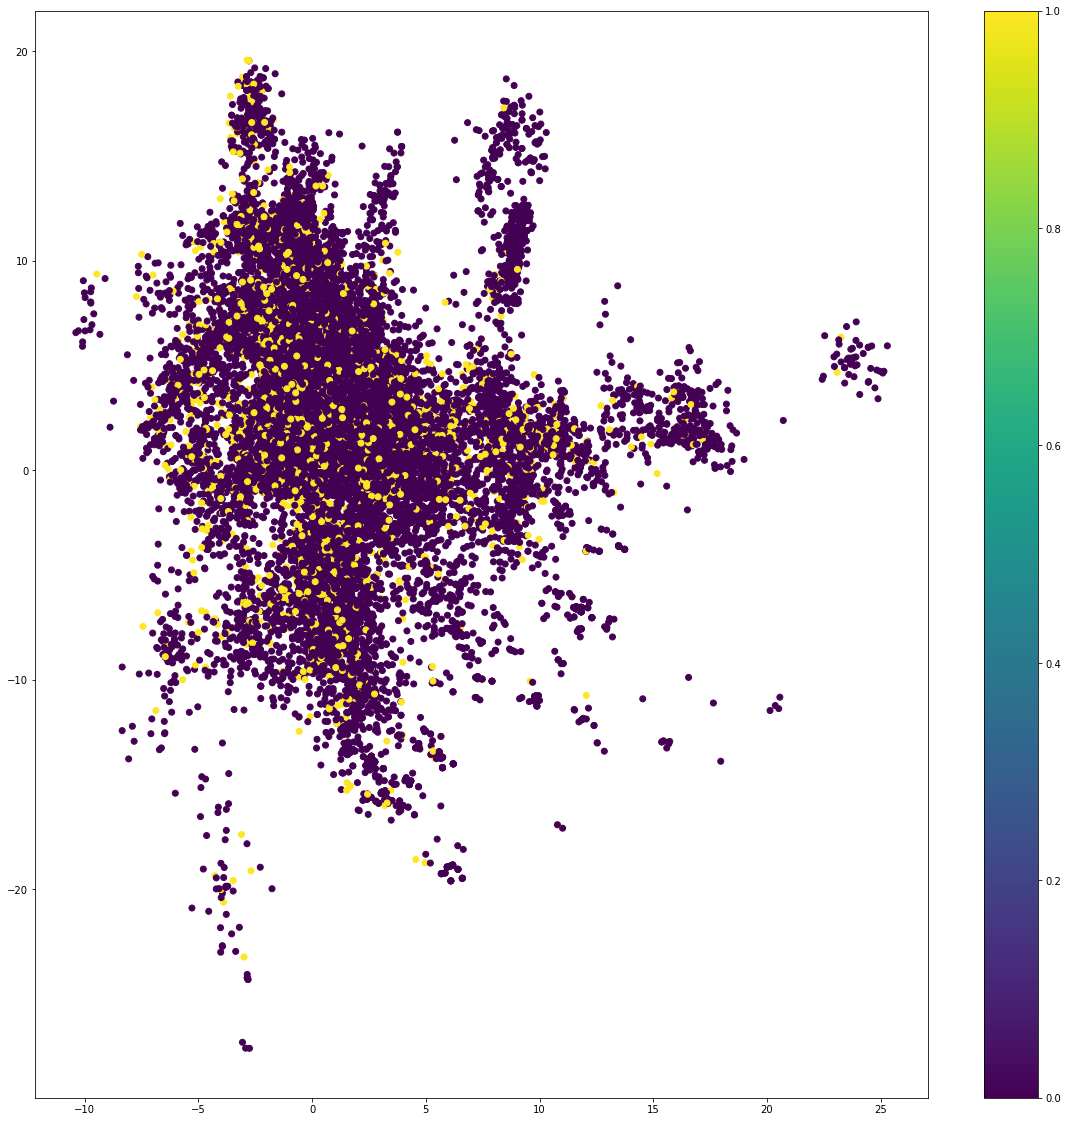

In [19]:
# build a model to project inputs on the latent space
encoder = Model(x, z_mean)
 
# display a 2D plot of the digit classes in the latent space
x_test_encoded = encoder.predict(X_test, batch_size=batch_size)
plt.figure(figsize=(20, 20))
plt.scatter(x_test_encoded[:, 0], x_test_encoded[:, 1], c=Y_test)
plt.colorbar()
plt.show()
 
# build a digit generator that can sample from the learned distribution
decoder_input = Input(shape=(latent_dim,))
_h_decoded = decoder_h(decoder_input)
_x_decoded_mean = decoder_mean(_h_decoded)
generator = Model(decoder_input, _x_decoded_mean)